# Guía de Ejercicios
## Objetivos de trabajo

* _Primer objetivo_: Análisis Exploratorio.
* __Segundo Objetivo__: Regresión.

## Libro de código

1. __total_bill__: Total de la cuenta
1. __tip__: Propina entregada
1. __sex__: Sexo del camarero
1. __smoker__: Zona fumadores o no
1. __day__: Día de la semana
1. __time__: Momento del día (Lunch / Dinner)
1. __size__: Número de los comensales en la mesa

# Ahora vamos con Python

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
print(df['sex'].value_counts() / len(df))
print(df['smoker'].value_counts() / len(df))
print(df['day'].value_counts() / len(df))
print(df['time'].value_counts() / len(df))

Male      0.643443
Female    0.356557
Name: sex, dtype: float64
No     0.618852
Yes    0.381148
Name: smoker, dtype: float64
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64
Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64


In [5]:
df['female'] = 0 

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,female
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [7]:
df['female'] = df['sex'].replace(['Male','Female'],[0,1])

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,female
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [9]:
df['smoker_dm'] = df['smoker'].replace(['No','Yes'],[0,1])
df['lunch'] = df['time'].replace(['Dinner','Lunch'],[0,1])


In [12]:
pd.crosstab(df['female'], df['sex'])

sex,Female,Male
female,,
0,0,157
1,87,0


In [17]:
df['labor_days']=df['day'].map({'Sat' : 0, 'Sun': 0, 'Thur': 1, 'Fri' : 1})

In [18]:
pd.crosstab(df['day'], df['labor_days'])

labor_days,0,1
day,,
Fri,0,19
Sat,87,0
Sun,76,0
Thur,0,62


## Gráficos

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


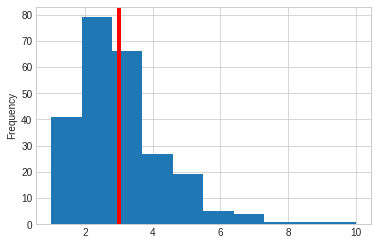

In [30]:
df['tip'].plot(kind='hist')
plt.axvline(df['tip'].mean(),color='red', lw=4)

{'boxes': [<matplotlib.lines.Line2D at 0x7fe9d4364668>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe9d436d160>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9d436de80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9d436da20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe9d43647f0>,
  <matplotlib.lines.Line2D at 0x7fe9d4364cc0>]}

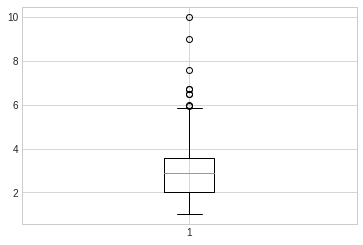

In [31]:
plt.boxplot(df['tip'])

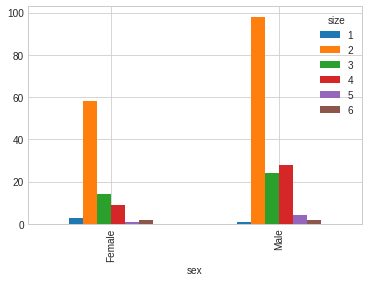

In [35]:
cross = pd.crosstab(df['sex'], df['size'])
cross.plot(kind='bar')

In [36]:
import seaborn as sns

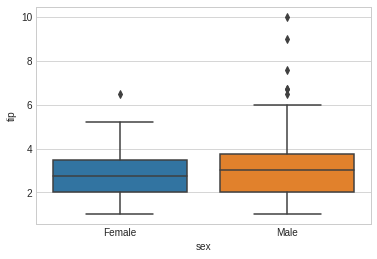

In [37]:
sns.boxplot(df['sex'], df['tip'])

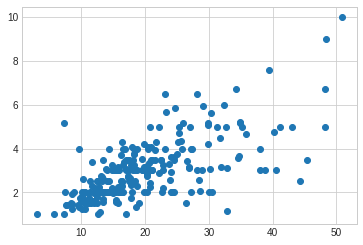

In [39]:
plt.plot(df['total_bill'], df['tip'], 'o') 
#gráfico con plt

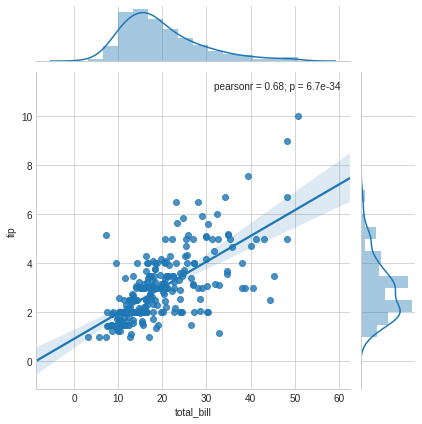

In [41]:
#gráfico con seaborn
sns.jointplot(df['total_bill'], df['tip'], kind='reg')

In [42]:
correlation_mat = df.corr()

In [43]:
correlation_mat

,total_bill,tip,size,female,smoker_dm,lunch,labor_days
total_bill,1.000000,0.675734,0.598315,-0.144877,0.085721,-0.183118,-0.176770
tip,0.675734,1.000000,0.489299,-0.088862,0.005929,-0.121629,-0.120198
size,0.598315,0.489299,1.000000,-0.086195,-0.133178,-0.103411,-0.148022
female,-0.144877,-0.088862,-0.086195,1.000000,-0.002816,0.205231,0.220194
smoker_dm,0.085721,0.005929,-0.133178,-0.002816,1.000000,-0.054921,0.020196
lunch,-0.183118,-0.121629,-0.103411,0.205231,-0.054921,1.000000,0.881758
labor_days,-0.176770,-0.120198,-0.148022,0.220194,0.020196,0.881758,1.000000


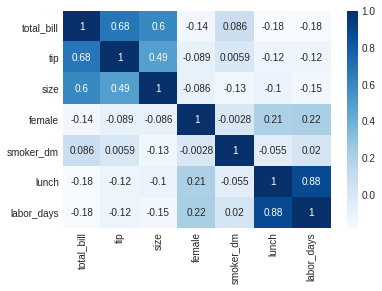

In [45]:
sns.heatmap(correlation_mat, cmap='Blues', annot=True)

## Regresión

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [51]:
modelo_1 = smf.ols('tip ~ total_bill', df)
modelo_1 = modelo_1.fit()

In [53]:
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 21 Apr 2018   Prob (F-statistic):           6.69e-34
Time:                        12:40:40   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
modelo_2 = smf.ols('tip ~ female',df).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.926
Date:                Sat, 21 Apr 2018   Prob (F-statistic):              0.166
Time:                        12:50:29   Log-Likelihood:                -423.98
No. Observations:                 244   AIC:                             852.0
Df Residuals:                     242   BIC:                             859.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0896      0.110     28.032      0.000       2.873       3.307
female        -0.2562      0.185     -1.388      0.166      -0.620       0.107
==============================================================================
Omnibus:                       75.995   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.975
Skew:                           1.415   Prob(JB):                     4.59e-43
Kurtosis:                       6.342   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
modelo_3 = smf.ols('tip ~ size',df).fit().summary()

In [56]:
modelo_3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     76.18
Date:                Sat, 21 Apr 2018   Prob (F-statistic):           4.30e-16
Time:                        12:52:56   Log-Likelihood:                -391.56
No. Observations:                 244   AIC:                             787.1
Df Residuals:                     242   BIC:                             794.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1691      0.223      5.233      0.000       0.729       1.609
size           0.7118      0.082      8.728      0.000       0.551       0.872
==============================================================================
Omnibus:                       81.369   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.339
Skew:                           1.393   Prob(JB):                     4.42e-60
Kurtosis:                       7.373   Cond. No.                         8.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""